# Kaggle

A UK-based online retail store has captured the sales data for different products for the period of one year (Nov 2016 to Dec 2017). The organization sells gifts primarily on the online platform. The customers who make a purchase consume directly for themselves. There are small businesses that buy in bulk and sell to other customers through the retail outlet channel.

## Project Objective:
Find significant customers for the business who make high purchases of their favourite products. The organization wants to roll out a loyalty program to the high-value customers after identification of segments. Use the clustering methodology to segment customers into groups:

## Domain: E-commerce

#### Dataset Description:
This is a transnational dataset that contains all the transactions occurring between Nov-2016 to Dec-2017 for a UK-based online retail store.

#### Attribute Description
InvoiceNo Invoice number (A 6-digit integral number uniquely assigned to each transaction)
StockCode Product (item) code
Description Product (item) name
Quantity The quantities of each product (item) per transaction
InvoiceDate The day when each transaction was generated
UnitPrice Unit price (Product price per unit)
CustomerID Customer number (Unique ID assigned to each customer)
Country Country name (The name of the country where each customer resides)
Analysis tasks to be performed:
Use the clustering methodology to segment customers into groups:
Use the following clustering algorithms:

#### K means
Hierarchical
• Identify the right number of customer segments.
• Provide the number of customers who are highly valued.
• Identify the clustering algorithm that gives maximum accuracy and explains robust clusters.
• If the number of observations is loaded in one of the clusters, break down that cluster further using the clustering algorithm. [ hint: Here loaded means if any cluster has more number of data points as compared to other clusters then split that clusters by increasing the number of clusters and observe, compare the results with previous results.]

# Planning IOT (input | output | tasks)

1. Input 

    - Select the MOST VALUABLE CLIENTS t}o engage in a fidellity program called "insiders", using sells data from November/2015 to December/2017

2. Output

    - Point out the customers who are most likelly to be a part of the program "INSIDERS"
    - Report the answers to the following questions:
        -- Who is ellegible for the program?
        
        -- How many clients are going to be a part of the program?
        
        -- Which are the main characteristics of these clients?
        
        -- What is the percentage of revenue coming from this group contribution?
        
        -- What is the expectation of revenue coming from this group for the next few months?
        
        -- Which are the conditions for a person to be elegible to this program?
        
        -- Which are the conditions for a person to be removed from this program?
        
        -- What is the guarantee that the "INSIDERS" program is better than the rest of the customers?
        
        -- Which actions can the marketing team take to increase revenue?
        
3. Tasks

    - Sugesting solutions:
    
        -- Who is ellegible? What defines elligibility? Who is a valuable customer to the company?
        
            * Revenue:
                ** High LTV value
                ** High frequency
                ** Large basket size
                ** Low churn probability
                ** High LTV previsibility
                
            * Cost:
                ** Low devolution number
                
            * Experience:
                ** Good feedback 
        -- How many clients are going to be a part of the program?
        
            * Number of clients
            * % to the total number of clients
        
        -- Which are the main characteristics of these clients?
        
            * Main attributes of clients:
                ** Age
                ** Country
                ** Salary
            
            * Main shopping behaviours
        
        -- What is the percentage of revenue coming from this group contribution?
            
            * Calculate company´s total revenue
            * Calculate INSIDERS cluster revenue
        
        -- What is the expectation of revenue coming from this group for the next few months?
            
            * Calculate LTV of INSIDERS cluster
            * Time series (ARMA, ARIMA, HoltWinter, etc)
        
        -- Which are the conditions for a person to be elegible to this program?
            
            * When is the evaluation taking place?
            * Is the client´s behaviour close to the INSIDERS cluster?
        
        -- Which are the conditions for a person to be removed from this program?
        
            * CLient´s behaviour is not close to the average of INSIDERS cluster
        
        -- What is the guarantee that the "INSIDERS" program is better than the rest of the customers?
        
            * Hypothesis test
            * A/B test
        
        -- Which actions can the marketing team take to increase revenue?
        
            * Discounts
            * Exclusive products
        



# 0. Imports

## Libraries

In [1]:
# Jupyter settings
from IPython.core.display      import display, HTML
from IPython.display           import Image

# data manipulation
import inflection
import datetime
import math
import random
import numpy as np
import pandas as pd
from scipy import stats as ss
import re

# EDA
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import express as px

# import umap
import umap

# sklearn
from sklearn import cluster as c
from sklearn import metrics as m
from sklearn import preprocessing as pp
from sklearn import decomposition as dd
from sklearn import manifold as mn
from sklearn import ensemble as en
from sklearn import mixture as mx

# metrics
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer

## Functions

In [2]:
# jupyter setup
def jupyter_settings():
    
    # jupyter core settings
    display(HTML("<style>.container { width:95% !important; }</style>"))
    
    # pandas
    pd.set_option('display.max_rows', 500)
    pd.set_option('display.max_columns', 500)
    pd.set_option('display.expand_frame_repr', False)
    
    # matplotlib
    !pylab inline
    !matplotlib inline
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = [35, 12]
    plt.rcParams['font.size'] = 30
    
    # seaborn
    sns.set()
    
    # yellowbrick
    yellowbrick.style.rcmod.set_aesthetic()

    
# descriptive analysis summary for numerical features
def num_analysis(num_attributes):
    
    # Cemtral tendency - mean, median
    ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
    ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

    # Dispersion - std, min, max, range, skew, kurtosis
    d1 = pd.DataFrame(num_attributes.apply(np.std)).T
    d2 = pd.DataFrame(num_attributes.apply(min)).T
    d3 = pd.DataFrame(num_attributes.apply(max)).T
    d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
    d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
    d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

    # concatenate
    m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
    m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis',]
    
    # histogram
    hist = num_attributes.hist(bins=30)
    
    return m

    return hist

In [3]:
jupyter_settings()

/bin/bash: pylab: command not found
/bin/bash: matplotlib: command not found


## Data

In [4]:
df_raw = pd.read_csv('../data/raw/Ecommerce.csv', encoding="iso8859-1")

In [5]:
df_raw = df_raw.drop(columns=["Unnamed: 8"])

# 1. Descriptive Analysis 

In [6]:
df1 = df_raw.copy()

In [7]:
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,7-Dec-17,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,7-Dec-17,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,7-Dec-17,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,7-Dec-17,4.15,12680.0,France


## 1.1. Rows and Columns

In [8]:
print('Number of rows: ', df1.shape[0])
print('Number of columns: ', df1.shape[1])

Number of rows:  541909
Number of columns:  8


In [9]:
# rename columns
snakecase = lambda x: inflection.underscore(x)
df1.columns = list(map(snakecase, df1.columns))

## 1.2. Data Types

In [10]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.3. Check NA

In [11]:
df1['customer_id'].isna().sum()

135080

In [12]:
df1.isna().sum()/df1.shape[0]

invoice_no      0.000000
stock_code      0.000000
description     0.002683
quantity        0.000000
invoice_date    0.000000
unit_price      0.000000
customer_id     0.249267
country         0.000000
dtype: float64

### Fill NA

In [13]:
# replacing customer_id or dropping?
df_missing = df1.loc[df1['customer_id'].isna(), :]
df_not_missing = df1.loc[~df1['customer_id'].isna(), :]

In [14]:
print(df_not_missing['customer_id'].min())
print(df_not_missing['customer_id'].max())

12346.0
18287.0


In [15]:
# create customer_id for each unique invoice_no (purchase event) associated with a null customer_id, that will invalidade the creation of recency and frquency features for these customers. 
# That may be a possibility for filling null values but may also create distortions in the cluster analysis in the future
# Therefore, this part of the code might be invalidated later and serves only as an example of NA fillout when dropping rows reduces a considerable part of the data 
# df_backup = pd.DataFrame(df_missing['invoice_no'].drop_duplicates())
# df_backup['customer_id'] = np.arange(19000, 19000+len(df_backup), 1) # customer_id.max() = 18287

# merge original with reference dataframe
# df1 = pd.merge(df1, df_backup, on='invoice_no', how='left')

In [16]:
# coalesce
# df1['customer_id'] = df1['customer_id_x'].combine_first( df1['customer_id_y'] )

# drop extra columns
# df1 = df1.drop(columns=['customer_id_x', 'customer_id_y'], axis=1)

df1 = df_not_missing.copy()
df1.head(5)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


In [17]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## 1.4. Change dtypes

In [18]:
# invoice date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

# customer id
df1['customer_id'] = df1['customer_id'].astype(int)

df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [19]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

## 1.5. Descriptive Statistics

In [20]:
num_attributes = df1.select_dtypes(include=['float64', 'int64'])
cat_attributes = df1.select_dtypes(exclude=['float64', 'int64'])

### Numerical Attributes

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,quantity,-80995.0,80995.0,161990.0,12.061303,5.00,248.693064,0.182663,94317.563673
1,unit_price,0.0,38970.0,38970.0,3.460471,1.95,69.315077,452.219019,246924.542988
2,customer_id,12346.0,18287.0,5941.0,15287.690570,15152.00,1713.598197,0.029835,-1.179982


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


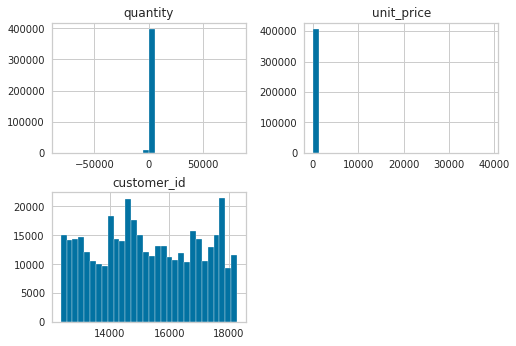

In [21]:
num_analysis(num_attributes)

# negative quantity? may be devolution
# unitary price equal to zero and negative?

### Categorical Attributes

In [22]:
cat_attributes.apply(lambda x: x.unique().shape)

,invoice_no,stock_code,description,invoice_date,country
0,22190,3684,3896,305,37


### Invoice No

In [23]:
df1.loc[df1['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+', x))), :] # invoice_no with letters

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
141,C536379,D,Discount,-1,2016-11-29,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2016-11-29,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2016-11-29,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2016-11-29,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2016-11-29,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2017-12-07,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2017-12-07,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2017-12-07,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2017-12-07,1.25,17315,United Kingdom


In [24]:
df_aux = df1.loc[df1['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+', x))), :]

print('Number of invoices with letters: {}'.format(len(df_aux)))
print('Number of invoices with letters and negative quantity: {}'.format(len(df_aux[df_aux['quantity'] < 0])))

Number of invoices with letters: 8905
Number of invoices with letters and negative quantity: 8905


### Stock Code

In [25]:
# check stock codes with only characters
df_aux2 = df1.loc[df1['stock_code'].apply(lambda x: bool(re.search('^[a-zA-Z]+$', x))), :]
df_aux2
# ação
# 1. Remove stock_code in ['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK']

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
45,536370,POST,POSTAGE,3,2016-11-29,18.00,12583,France
141,C536379,D,Discount,-1,2016-11-29,27.50,14527,United Kingdom
386,536403,POST,POSTAGE,1,2016-11-29,15.00,12791,Netherlands
1123,536527,POST,POSTAGE,1,2016-11-29,18.00,12662,Germany
2239,536569,M,Manual,1,2016-11-29,1.25,16274,United Kingdom
...,...,...,...,...,...,...,...,...
541216,581494,POST,POSTAGE,2,2017-12-07,18.00,12518,Germany
541541,C581499,M,Manual,-1,2017-12-07,224.69,15498,United Kingdom
541730,581570,POST,POSTAGE,1,2017-12-07,18.00,12662,Germany
541767,581574,POST,POSTAGE,2,2017-12-07,18.00,12526,Germany


In [26]:
print('Unique stock codes with letters: {}'.format(df_aux2['stock_code'].unique()))
print('Percentage of unique stock codes with letters: {}'.format(df_aux2['stock_code'].shape[0] / df1.shape[0]))

Unique stock codes with letters: ['POST' 'D' 'M' 'PADS' 'DOT' 'CRUK']
Percentage of unique stock codes with letters: 0.004360554434418392


### Description

In [37]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


### Country

<AxesSubplot:xlabel='country', ylabel='count'>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


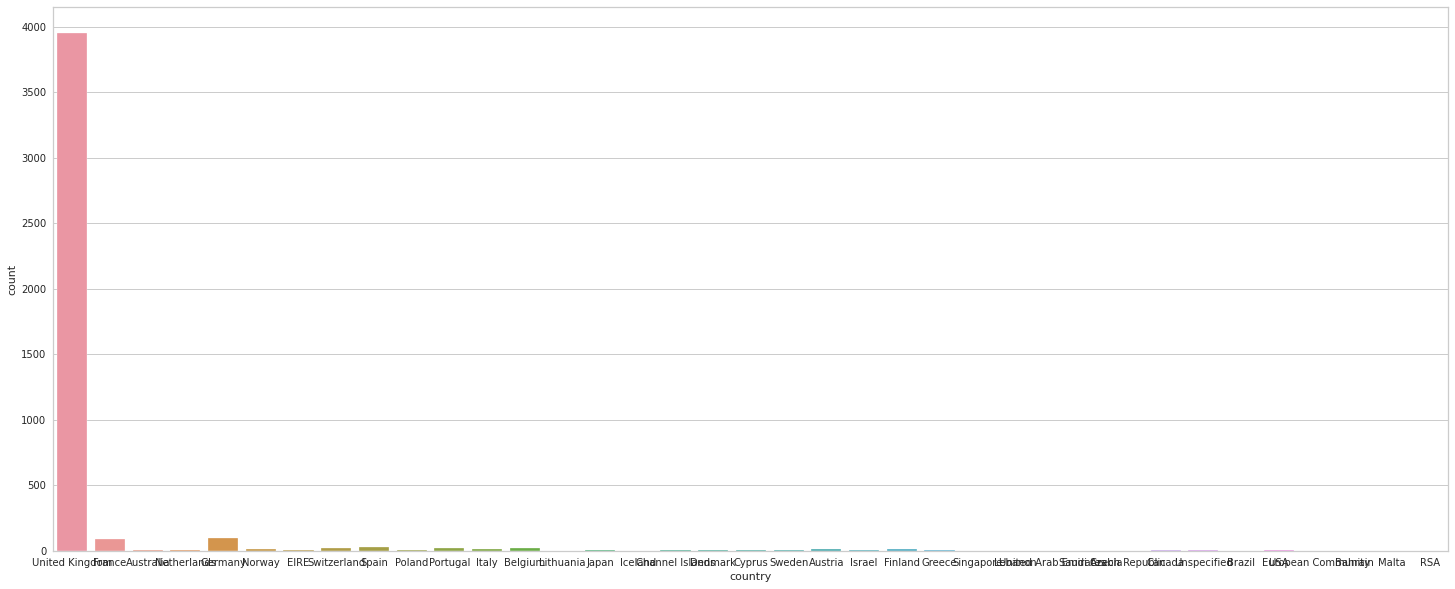

In [38]:
plt.figure(figsize=[25,10])
df_aux4 = df1[['customer_id', 'country']].drop_duplicates()
sns.countplot(x='country',data=df_aux4)

In [39]:
df1[['customer_id', 'country']].drop_duplicates().groupby('country').count().sort_values('customer_id', ascending=False)

,customer_id
country,
United Kingdom,3950
Germany,95
France,87
Spain,31
Belgium,25
Switzerland,21
Portugal,19
Italy,15
Finland,12


In [40]:
df1['country'].unique() # european comunnity  # Unspecified

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

# 2. Filter

In [27]:
df2 = df1.copy()

In [28]:
df2.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

In [29]:
# numerical attributes
df2 = df2.loc[df2['unit_price'] >= 0.04, :]
# categorical attributes
df2 = df2[~df2['stock_code'].isin(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY', 'DCGSSGIRL', 'PADS', 'B', 'CRUK'])]
# description
df2 = df2.drop(columns='description', axis=1)
# map
df2 = df2[~df2['stock_code'].isin(['European Community',  'Unspecified'])]
# bad customer ( devolution and small basket)
df2 = df2[~df2['customer_id'].isin([16446])]
# quantity
df2_returns = df2.loc[df1['quantity'] < 0, :]
df2_purchases = df2.loc[df1['quantity'] >= 0, :]

# 3. Feature Engineering

In [30]:
df3 = df2.copy()
# df2.to_csv('../data/interim/df2.csv')
df3

,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,6,2016-11-29,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,2017-12-07,0.85,12680,France
541905,581587,22899,6,2017-12-07,2.10,12680,France
541906,581587,23254,4,2017-12-07,4.15,12680,France
541907,581587,23255,4,2017-12-07,4.15,12680,France


In [31]:
df_ref = df3.drop(['invoice_no', 'stock_code', 'quantity', 'invoice_date', 'unit_price', 'country'], axis=1).drop_duplicates(ignore_index=True)
df_ref

,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100
...,...
4356,13436
4357,15520
4358,13298
4359,14569


### 1. Monetary

In [32]:
# gross revenue - Quantity x price
df2_purchases.loc[:, 'gross_revenue'] = df2_purchases.loc[:, 'quantity'] * df2_purchases.loc[:, 'unit_price']
                                
# monetary
df_monetary = df2_purchases.loc[:, ['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')

/home/lucas/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/lucas/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [33]:
df_ref.isna().sum()

customer_id       0
gross_revenue    27
dtype: int64

### 2. Recency

In [34]:
# days from last purchase
df_recency = df2_purchases.loc[:, ['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge(df_ref, df_recency, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
dtype: int64

### 3. Number of purchases

In [35]:
df_freq = (df2_purchases.loc[:, ['customer_id', 'invoice_no']].drop_duplicates()
                                                             .groupby( 'customer_id' )
                                                             .count()
                                                             .reset_index()
                                                             .rename( columns={'invoice_no': 'qtde_invoices'}) )
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
qtde_invoices    27
dtype: int64

### 4. Total number of products

In [36]:
df_freq = (df2_purchases.loc[:, ['customer_id', 'quantity']].groupby( 'customer_id' ).sum()
                                                           .reset_index()
                                                           .rename( columns={'quantity': 'qtde_items'} ) )
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
qtde_invoices    27
qtde_items       27
dtype: int64

### 5. Number of types of products

In [37]:
df_freq = (df2_purchases.loc[:, ['customer_id', 'stock_code']].groupby( 'customer_id' ).count()
                                                           .reset_index()
                                                           .rename( columns={'stock_code': 'qtde_products'} ) )
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
qtde_invoices    27
qtde_items       27
qtde_products    27
dtype: int64

### 6. Average ticket value

In [38]:
# Avg Ticket
df_avg_ticket = df2_purchases.loc[:, ['customer_id', 'gross_revenue']].groupby( 'customer_id' ).mean().reset_index().rename( columns={'gross_revenue':'avg_ticket'} )
df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
qtde_invoices    27
qtde_items       27
qtde_products    27
avg_ticket       27
dtype: int64

### 7. Average recency days

In [39]:
# Average recency days
df_aux = df2[['customer_id', 'invoice_date']].drop_duplicates().sort_values( ['customer_id', 'invoice_date'], ascending=['False', 'False'] )
df_aux['next_customer_id'] = df_aux['customer_id'].shift() # next customer
df_aux['previous_date'] = df_aux['invoice_date'].shift() # next invoince date

df_aux['avg_recency_days'] = df_aux.apply( lambda x: ( x['invoice_date'] - x['previous_date'] ).days if x['customer_id'] == x['next_customer_id'] else np.nan, axis=1 )

df_aux = df_aux.drop( ['invoice_date', 'next_customer_id', 'previous_date'], axis=1 ).dropna()

# average recency 
df_avg_recency_days = df_aux.groupby( 'customer_id' ).mean().reset_index()

# merge
df_ref = pd.merge( df_ref, df_avg_recency_days, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id            0
gross_revenue         27
recency_days          27
qtde_invoices         27
qtde_items            27
qtde_products         27
avg_ticket            27
avg_recency_days    1387
dtype: int64

### 8. Purchase frequency

In [40]:
df_aux = ( df2_purchases[['customer_id', 'invoice_no', 'invoice_date']].drop_duplicates()
                                                             .groupby( 'customer_id')
                                                             .agg( max_ = ( 'invoice_date', 'max' ), 
                                                                   min_ = ( 'invoice_date', 'min' ),
                                                                   days_= ( 'invoice_date', lambda x: ( ( x.max() - x.min() ).days ) + 1 ),
                                                                   buy_ = ( 'invoice_no', 'count' ) ) ).reset_index()
# Frequency
df_aux['frequency'] = df_aux[['buy_', 'days_']].apply( lambda x: x['buy_'] / x['days_'] if  x['days_'] != 0 else 0, axis=1 )

# Merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'frequency']], on='customer_id', how='left' )

df_ref.isna().sum()

customer_id            0
gross_revenue         27
recency_days          27
qtde_invoices         27
qtde_items            27
qtde_products         27
avg_ticket            27
avg_recency_days    1387
frequency             27
dtype: int64

### 9. Number of returns

In [41]:
# Number of Returns
df_returns = df2_returns[['customer_id', 'quantity']].groupby( 'customer_id' ).sum().reset_index().rename( columns={'quantity':'qtde_returns'} )
df_returns['qtde_returns'] = df_returns['qtde_returns'] * -1

df_ref = pd.merge( df_ref, df_returns, how='left', on='customer_id' )
df_ref.loc[df_ref['qtde_returns'].isna(), 'qtde_returns'] = 0

df_ref.isna().sum()

customer_id            0
gross_revenue         27
recency_days          27
qtde_invoices         27
qtde_items            27
qtde_products         27
avg_ticket            27
avg_recency_days    1387
frequency             27
qtde_returns           0
dtype: int64

### 10. Basket size

- Invoice No = purchase
- Stock Code = Product
- Quantity = Item

In [42]:
df_aux = ( df2_purchases.loc[:, ['customer_id', 'invoice_no', 'quantity']].groupby( 'customer_id' )
                                                                            .agg( n_purchase=( 'invoice_no', 'nunique'),
                                                                                  n_products=( 'quantity', 'sum' ) )
                                                                            .reset_index() )

# calculation
df_aux['avg_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

# merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'avg_basket_size']], how='left', on='customer_id' )
df_ref.isna().sum()

customer_id            0
gross_revenue         27
recency_days          27
qtde_invoices         27
qtde_items            27
qtde_products         27
avg_ticket            27
avg_recency_days    1387
frequency             27
qtde_returns           0
avg_basket_size       27
dtype: int64

### 11. Unique basket size

In [43]:
df_aux = ( df2_purchases.loc[:, ['customer_id', 'invoice_no', 'stock_code']].groupby( 'customer_id' )
                                                                            .agg( n_purchase=( 'invoice_no', 'nunique'),
                                                                                   n_products=( 'stock_code', 'nunique' ) )
                                                                            .reset_index() )

# calculation
df_aux['avg_unique_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

# merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'avg_unique_basket_size']], how='left', on='customer_id' )
df_ref.isna().sum()

customer_id                  0
gross_revenue               27
recency_days                27
qtde_invoices               27
qtde_items                  27
qtde_products               27
avg_ticket                  27
avg_recency_days          1387
frequency                   27
qtde_returns                 0
avg_basket_size             27
avg_unique_basket_size      27
dtype: int64

In [44]:
df_ref

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,1733.0,297.0,18.152222,35.500000,17.000000,40.0,50.970588,0.617647
1,13047,3232.59,56.0,9.0,1390.0,171.0,18.904035,27.250000,0.028302,35.0,154.444444,11.666667
2,12583,6705.38,2.0,15.0,5028.0,232.0,28.902500,23.187500,0.040323,50.0,335.200000,7.600000
3,13748,948.25,95.0,5.0,439.0,28.0,33.866071,92.666667,0.017921,0.0,87.800000,4.800000
4,15100,876.00,333.0,3.0,80.0,3.0,292.000000,8.600000,0.073171,22.0,26.666667,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
4356,13436,196.89,1.0,1.0,76.0,12.0,16.407500,NaN,1.000000,0.0,76.000000,12.000000
4357,15520,343.50,1.0,1.0,314.0,18.0,19.083333,NaN,1.000000,0.0,314.000000,18.000000
4358,13298,360.00,1.0,1.0,96.0,2.0,180.000000,NaN,1.000000,0.0,96.000000,2.000000
4359,14569,227.39,1.0,1.0,79.0,12.0,18.949167,NaN,1.000000,0.0,79.000000,10.000000


In [45]:
df_ref.isna().sum()

customer_id                  0
gross_revenue               27
recency_days                27
qtde_invoices               27
qtde_items                  27
qtde_products               27
avg_ticket                  27
avg_recency_days          1387
frequency                   27
qtde_returns                 0
avg_basket_size             27
avg_unique_basket_size      27
dtype: int64

# 4. EDA (Exploratory Data Analysis)

In [46]:
df4 = df_ref.dropna()
df4.isna().sum()

customer_id               0
gross_revenue             0
recency_days              0
qtde_invoices             0
qtde_items                0
qtde_products             0
avg_ticket                0
avg_recency_days          0
frequency                 0
qtde_returns              0
avg_basket_size           0
avg_unique_basket_size    0
dtype: int64

In [47]:
# df4.to_csv('../data/interim/df4.csv')
# df4 = pd.read_csv('../data/interim/df4.csv')

## 1. Univariate Analysis

## 2. Bivariate Analysis

In [48]:
df42 = df4.drop('customer_id', axis=1)

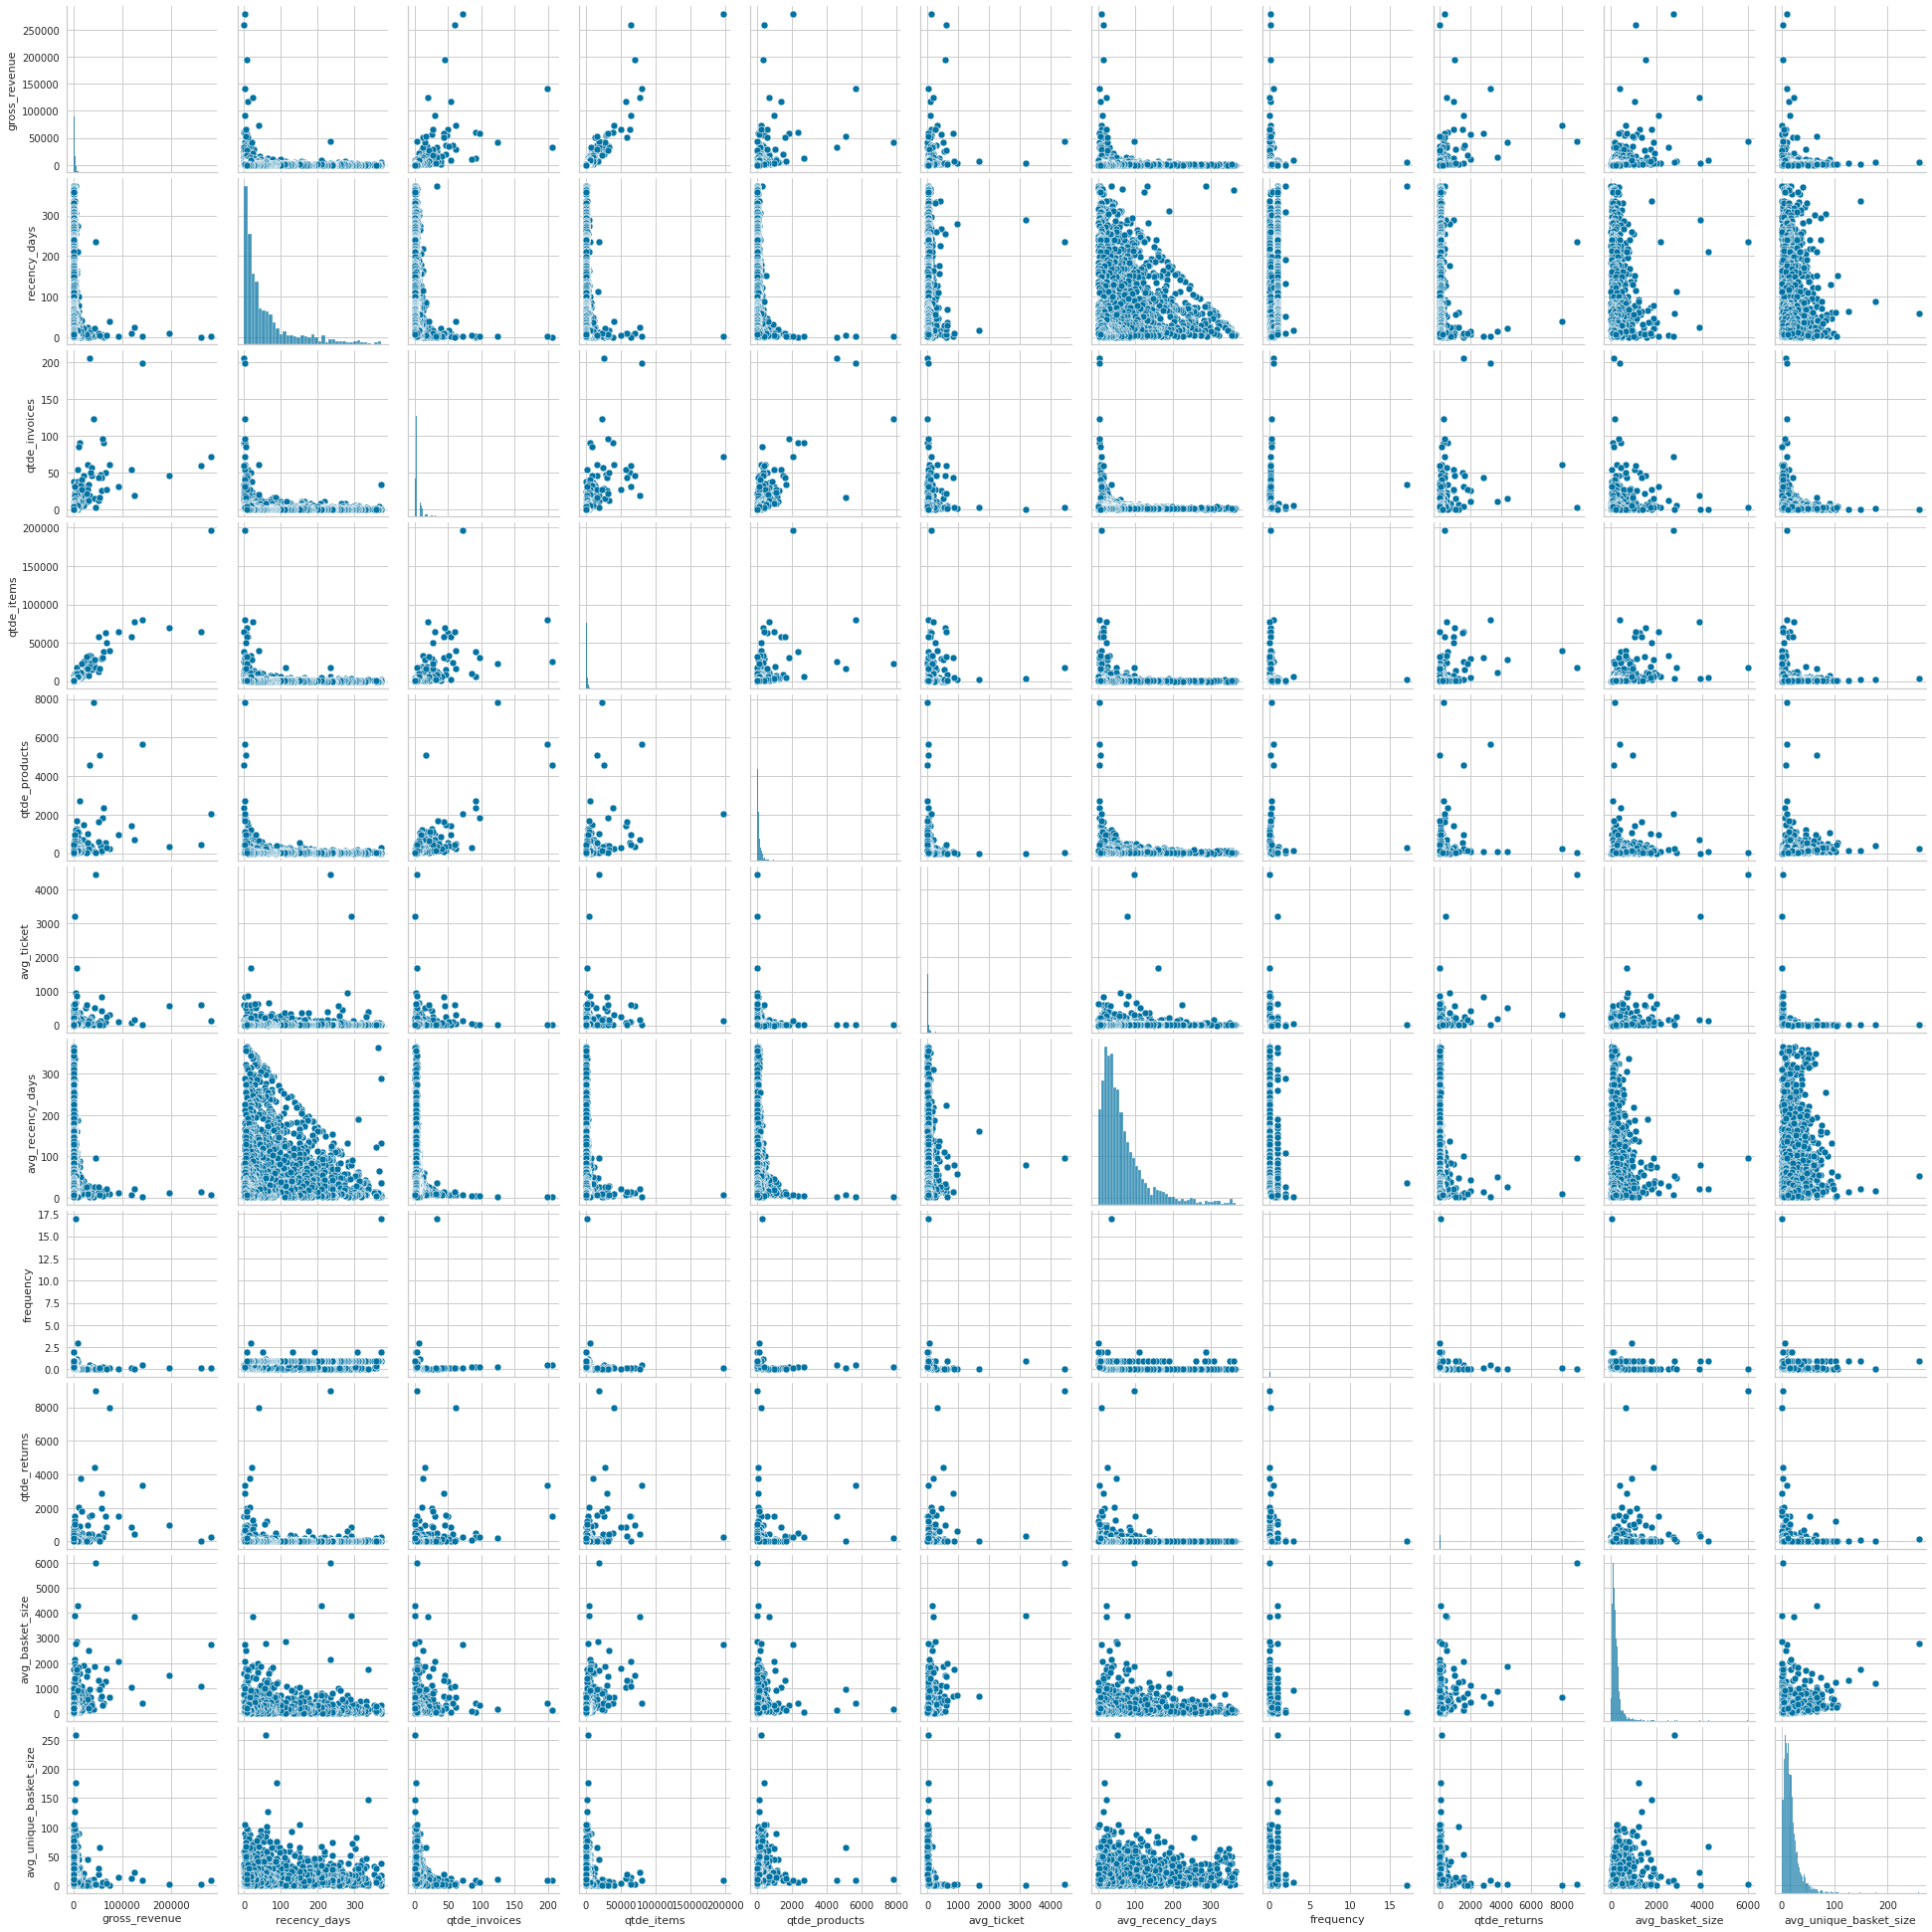

In [62]:
sns.pairplot(df42)

* Frequency and Avg Ticket both have low variance

## 3. Space Study

In [49]:
df4.columns

Index(['customer_id', 'gross_revenue', 'recency_days', 'qtde_invoices',
       'qtde_items', 'qtde_products', 'avg_ticket', 'avg_recency_days',
       'frequency', 'qtde_returns', 'avg_basket_size',
       'avg_unique_basket_size'],
      dtype='object')

In [50]:
cols_selected = ['gross_revenue', 'recency_days', 'qtde_invoices',
       'qtde_items', 'qtde_products', 'qtde_returns']
df43 = df4[cols_selected].copy()

In [51]:
mm = pp.MinMaxScaler()

df43['gross_revenue'] = mm.fit_transform(df43[['gross_revenue']])
df43['recency_days'] = mm.fit_transform(df43[['recency_days']])
df43['qtde_invoices'] = mm.fit_transform(df43[['qtde_invoices']])
df43['qtde_items'] = mm.fit_transform(df43[['qtde_items']])
df43['qtde_products'] = mm.fit_transform(df43[['qtde_products']])
# df43['avg_ticket'] = mm.fit_transform(df43[['avg_ticket']])
# df43['avg_recency_days'] = mm.fit_transform(df43[['avg_recency_days']])
# df43['frequency'] = mm.fit_transform(df43[['frequency']])
df43['qtde_returns'] = mm.fit_transform(df43[['qtde_returns']])
# df43['avg_basket_size'] = mm.fit_transform(df43[['avg_basket_size']])
# df43['avg_unique_basket_size'] = mm.fit_transform(df43[['avg_unique_basket_size']])

X = df43.copy()

In [52]:
X.shape

(2972, 6)

### 3.1. PCA

In [53]:
pca = dd.PCA(n_components=2)
principal_components = pca.fit_transform(X)

<BarContainer object of 2 artists>

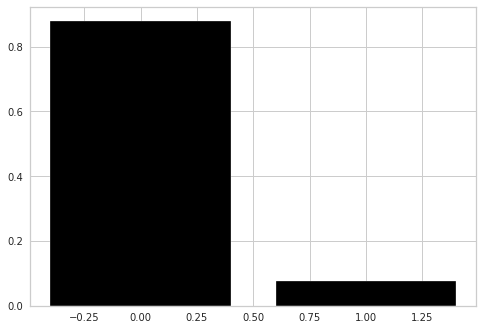

In [54]:
plt.bar(range(pca.n_components_) , pca.explained_variance_ratio_, color='black')

In [55]:
df_pca = pd.DataFrame(principal_components)
df_pca.columns = ['0', '1']
df_pca

,0,1
0,0.814553,0.152814
1,-0.023535,0.011482
2,-0.170391,0.036912
3,0.082690,-0.008052
4,0.719901,0.026026
...,...,...
2967,-0.140938,-0.034678
2968,-0.152117,-0.029130
2969,-0.169988,-0.007990
2970,-0.150070,-0.022861


<AxesSubplot:xlabel='0', ylabel='1'>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


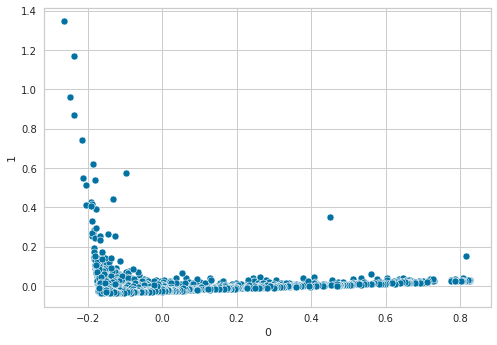

In [56]:
sns.scatterplot(x='0', y='1', data=df_pca)

### 3.2. UMAP

In [59]:
# dimensionality reducer - UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X)

# embedding
df_umap = pd.DataFrame()
df_umap['embedding_x'] = embedding[:, 0]
df_umap['embedding_y'] = embedding[:, 1]

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

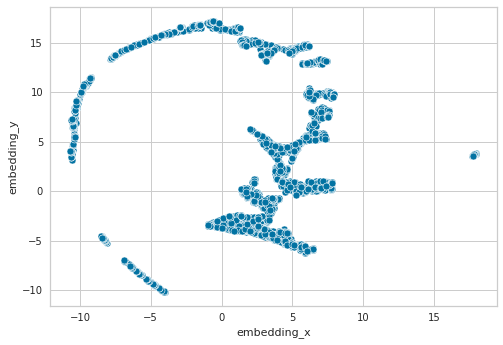

In [60]:
# plot UMAP
sns.scatterplot(x='embedding_x', y='embedding_y', data=df_umap) 

### 3.3. t-SNE

/home/lucas/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/lucas/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

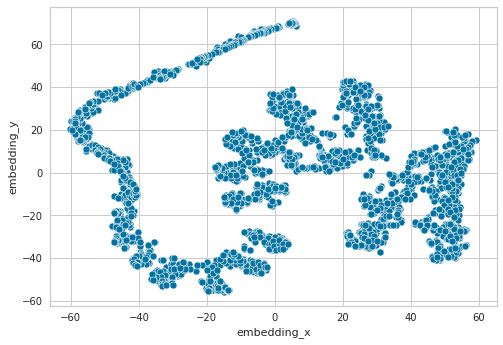

In [61]:
# dimensionality reducer - t-SNE
reducer = mn.TSNE(n_components=2, n_jobs=-1,random_state=42)
embedding = reducer.fit_transform(X)

# embedding
df_tsne = pd.DataFrame()
df_tsne['embedding_x'] = embedding[:, 0]
df_tsne['embedding_y'] = embedding[:, 1]

# plot t-SNE
sns.scatterplot(x='embedding_x', y='embedding_y', data=df_tsne) 

# 5. Data Preparation 

In [62]:
# df5 = df4.copy()

# 6. Feature Selection

In [63]:
# df6 = df5.copy()

# 7. Hyper Parameter Fine Tuning

## 7.1. Using UMAP

In [64]:
X = df_umap.copy()
X.head()

,embedding_x,embedding_y
0,17.837790,3.689380
1,4.728441,14.084366
2,1.273083,-3.704107
3,-1.869391,16.426497
4,-4.010643,-10.218374


In [65]:
clusters = np.arange(2, 25, 1)
clusters

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24])

In [66]:
kmeans_list = []
for k in clusters:
    # model definition
    kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

    # model training
    kmeans.fit(X)
    
    # model predict
    labels = kmeans.predict(X)
    
    # model performance
    sil = m.silhouette_score(X, labels, metric='euclidean')
    kmeans_list.append(sil)    

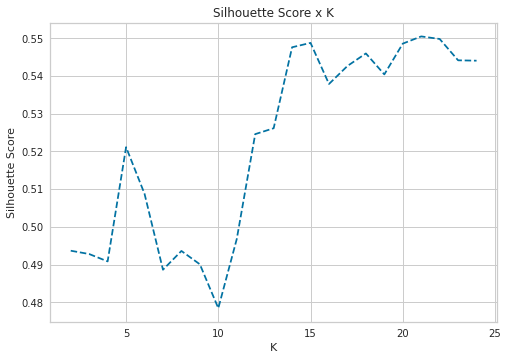

In [67]:
plt.plot(clusters, kmeans_list, linestyle='--', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

## GMM

In [68]:
gmm_list = []
for k in clusters:
    # model definition
    gmm = mx.GaussianMixture(n_components=k, n_init=50, random_state=42)
    
    # model training
    gmm.fit(X)
    
    # model predict
    labels = gmm.predict(X)
    
    # model performance
    sil = m.silhouette_score(X, labels, metric='euclidean')
    gmm_list.append(sil)    

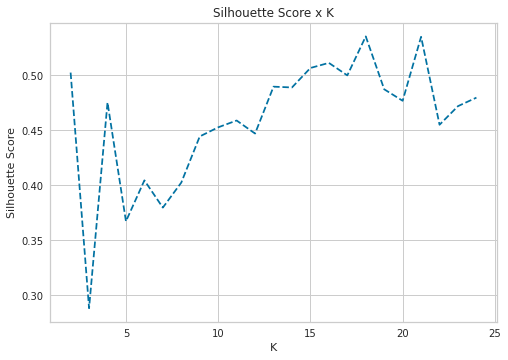

In [69]:
plt.plot(clusters, gmm_list, linestyle='--', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

## Hierarchical Clustering

In [70]:
from scipy.cluster import hierarchy as hc

In [71]:
hc_list = []
for k in clusters:
    # model definition & training 
    hc_model = hc.linkage(X, 'ward')
    
    # model predict
    labels = hc.fcluster(hc_model, k, criterion='maxclust')
    
    # metrics
    sil = m.silhouette_score(X, labels, metric='euclidean')
    hc_list.append(sil)

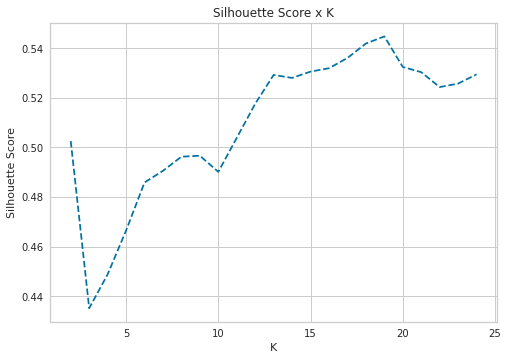

In [72]:
plt.plot(clusters, hc_list, linestyle='--', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

In [73]:
cm = sns.light_palette('blue', as_cmap=True)
df_results = pd.DataFrame({'KMeans':kmeans_list, 'GMM':gmm_list, 'HClustering':hc_list}).T
df_results.style.background_gradient(cmap=cm, axis=0)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
KMeans,0.493668,0.492788,0.490830,0.521116,0.508772,0.488627,0.493604,0.490064,0.478424,0.496763,0.524575,0.526135,0.547604,0.548768,0.537871,0.542643,0.545970,0.540412,0.548570,0.550484,0.549805,0.544144,0.544048
GMM,0.502580,0.288101,0.475448,0.367200,0.404469,0.379673,0.402472,0.444449,0.452758,0.458962,0.447087,0.489773,0.489039,0.506776,0.511410,0.500031,0.535515,0.487382,0.476907,0.535179,0.455102,0.472035,0.479788
HClustering,0.502580,0.435172,0.448822,0.466490,0.485884,0.490591,0.496286,0.496666,0.490158,0.503885,0.517633,0.529258,0.528048,0.530594,0.531963,0.536097,0.541916,0.544794,0.532481,0.530367,0.524349,0.525768,0.529492


In [74]:
cm = sns.light_palette('blue', as_cmap=True)
df_results = pd.DataFrame({'KMeans':kmeans_list, 'GMM':gmm_list, 'HClustering':hc_list}).T.loc[:, 6:12]
df_results.style.background_gradient(cmap=cm, axis=0)

,6,7,8,9,10,11,12
KMeans,0.493604,0.490064,0.478424,0.496763,0.524575,0.526135,0.547604
GMM,0.402472,0.444449,0.452758,0.458962,0.447087,0.489773,0.489039
HClustering,0.496286,0.496666,0.490158,0.503885,0.517633,0.529258,0.528048


In [75]:
# model definition & training 
hc_model = hc.linkage(X, 'ward')
    
# model predict
labels = hc.fcluster(hc_model, 6, criterion='maxclust')
    
# plot
X['labels'] = labels

X.head()

,embedding_x,embedding_y,labels
0,17.837790,3.689380,4
1,4.728441,14.084366,1
2,1.273083,-3.704107,6
3,-1.869391,16.426497,3
4,-4.010643,-10.218374,5


<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

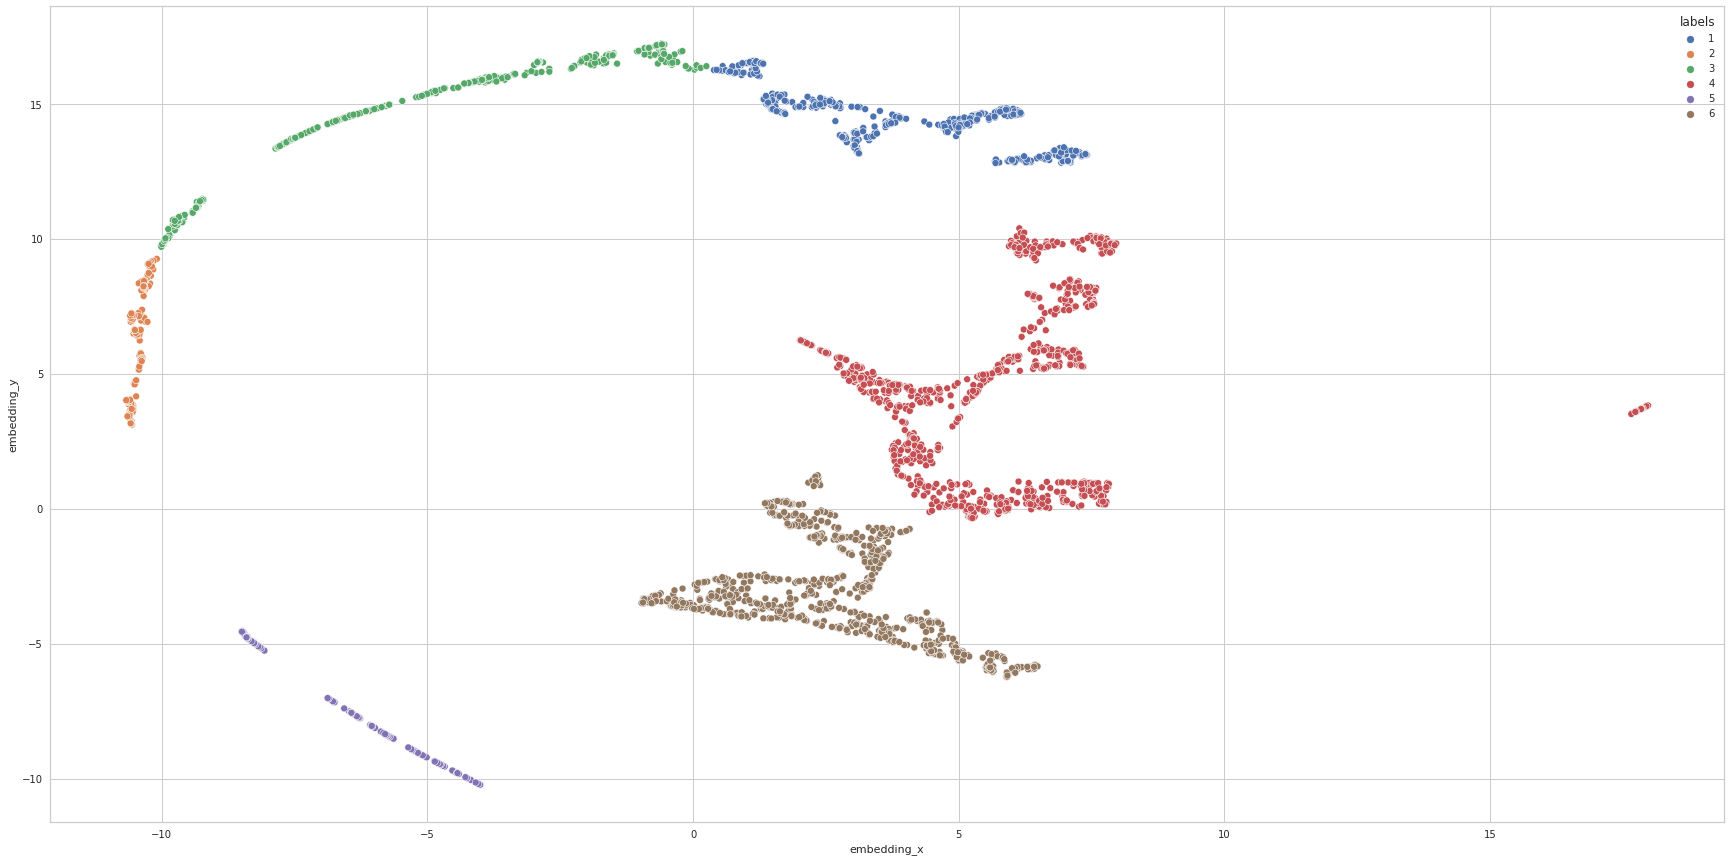

In [76]:
# plot UMAP with labels
plt.figure(figsize=(30,15))
sns.scatterplot(x='embedding_x', y='embedding_y', hue='labels', data=X, palette='deep')

### Cluster Analysis

In [78]:
df9 = df4.copy()
df9['cluster'] = labels
df9.head()

### Number of Customers for Cluster and Percentage by Cluster
df_cluster = df9[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100*(np.round(df_cluster['customer_id'] / df_cluster['customer_id'].sum(), decimals=5))

### Average Gross Revenue
df_avg_gross_revenue = df9[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, np.round(df_avg_gross_revenue, decimals=3), how='inner', on='cluster')

### Average Recency Days
df_avg_recency_revenue = df9[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, np.round(df_avg_recency_revenue, decimals=3), how='inner', on='cluster')

### Average Invoice N°
#df_avg_invoice_no = df9[['invoice_no', 'cluster']].groupby('cluster').mean().reset_index()
# df_cluster = pd.merge(df_cluster, np.round(df_avg_invoice_no, decimals=3), how='inner', on='cluster')
df_cluster.sort_values('gross_revenue', ascending=False)

,cluster,customer_id,perc_customer,gross_revenue,recency_days
5,6,836,28.129,5916.955,6.568
3,4,971,32.672,1799.589,35.148
0,1,445,14.973,1375.762,63.944
2,3,384,12.921,1151.044,118.099
1,2,181,6.090,768.728,193.641
4,5,155,5.215,711.053,276.948


### Cluster 06 (Candidate to INSIDERS classification)
    -- Highest gross revenue and high frequency
    -- Only 12,48% of costumers.
    -- Recency = 6.695 days average
    -- Average Gross Revenue: 11639.946 dolars
    

## 7.2. Using t-SNE

In [147]:
Y = df_tsne.copy()
Y.head()

,embedding_x,embedding_y
0,6.144710,68.768639
1,-15.132845,-41.354794
2,50.338051,-1.627503
3,-43.075611,-23.590437
4,0.906997,67.784508


In [69]:
clusters = np.arange(2, 25, 1)
clusters

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24])

In [70]:
kmeans_list = []
for k in clusters:
    # model definition
    kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

    # model training
    kmeans.fit(Y)
    
    # model predict
    labels = kmeans.predict(Y)
    
    # model performance
    sil = m.silhouette_score(Y, labels, metric='euclidean')
    kmeans_list.append(sil)    

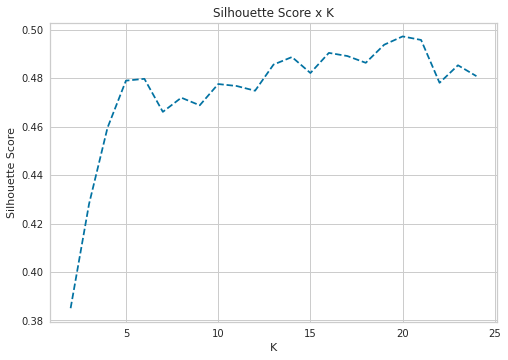

In [71]:
plt.plot(clusters, kmeans_list, linestyle='--', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

## GMM

In [72]:
gmm_list = []
for k in clusters:
    # model definition
    gmm = mx.GaussianMixture(n_components=k, n_init=100, random_state=42)
    
    # model training
    gmm.fit(Y)
    
    # model predict
    labels = gmm.predict(Y)
    
    # model performance
    sil = m.silhouette_score(Y, labels, metric='euclidean')
    gmm_list.append(sil)    

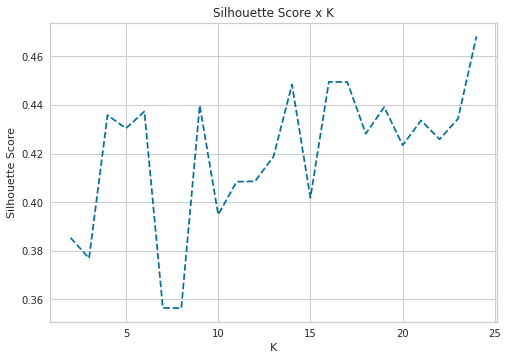

In [73]:
plt.plot(clusters, gmm_list, linestyle='--', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

## Hierarchical Clustering

In [74]:
from scipy.cluster import hierarchy as hc

In [75]:
hc_model = hc.linkage(Y, 'ward')

In [84]:
hc_list = []
for k in clusters:
    # model definition & training 
    hc_model = hc.linkage(Y, 'ward')
    
    # model predict
    labels = hc.fcluster(hc_model, k, criterion='maxclust')
    
    # metrics
    sil = m.silhouette_score(Y, labels, metric='euclidean')
    hc_list.append(sil)

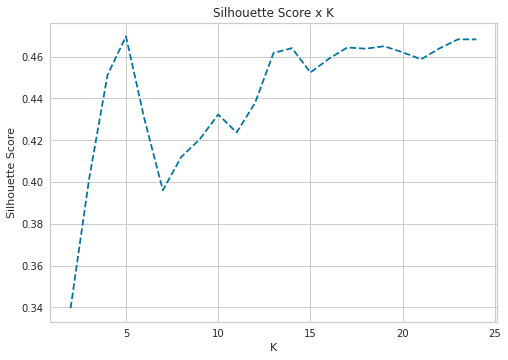

In [77]:
plt.plot(clusters, hc_list, linestyle='--', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

In [144]:
cm = sns.light_palette('blue', as_cmap=True)
df_results = pd.DataFrame({'KMeans':kmeans_list, 'GMM':gmm_list, 'HClustering':hc_list}).T
df_results.style.background_gradient(cmap=cm, axis=0)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
KMeans,0.385043,0.428077,0.459506,0.478951,0.479704,0.466072,0.471915,0.468775,0.477552,0.476742,0.474796,0.485580,0.488694,0.482099,0.490407,0.489114,0.486311,0.493782,0.497206,0.495743,0.478062,0.485298,0.480804
GMM,0.385304,0.376900,0.435815,0.430355,0.437318,0.356473,0.356338,0.439839,0.394850,0.408390,0.408578,0.418808,0.448386,0.401772,0.449500,0.449426,0.428176,0.439122,0.423448,0.433600,0.425843,0.434296,0.468203
HClustering,0.339626,0.401284,0.451166,0.469629,0.430157,0.396050,0.411979,0.420433,0.432281,0.423694,0.437836,0.461698,0.464018,0.452369,0.458953,0.464332,0.463760,0.464929,0.462018,0.458704,0.463915,0.468241,0.468201


In [145]:
cm = sns.light_palette('blue', as_cmap=True)
df_results = pd.DataFrame({'KMeans':kmeans_list, 'GMM':gmm_list, 'HClustering':hc_list}).T.loc[:, 6:13]
df_results.style.background_gradient(cmap=cm, axis=0)

,6,7,8,9,10,11,12,13
KMeans,0.471915,0.468775,0.477552,0.476742,0.474796,0.485580,0.488694,0.482099
GMM,0.356338,0.439839,0.394850,0.408390,0.408578,0.418808,0.448386,0.401772
HClustering,0.411979,0.420433,0.432281,0.423694,0.437836,0.461698,0.464018,0.452369


### Final Model (GMM)

In [153]:
# model definition
kmeans = c.KMeans(init='random', n_clusters=8, n_init=10, max_iter=300, random_state=42)

# model training
kmeans.fit(Y)
    
# model predict
labels = kmeans.predict(Y)

Y['labels'] = labels

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

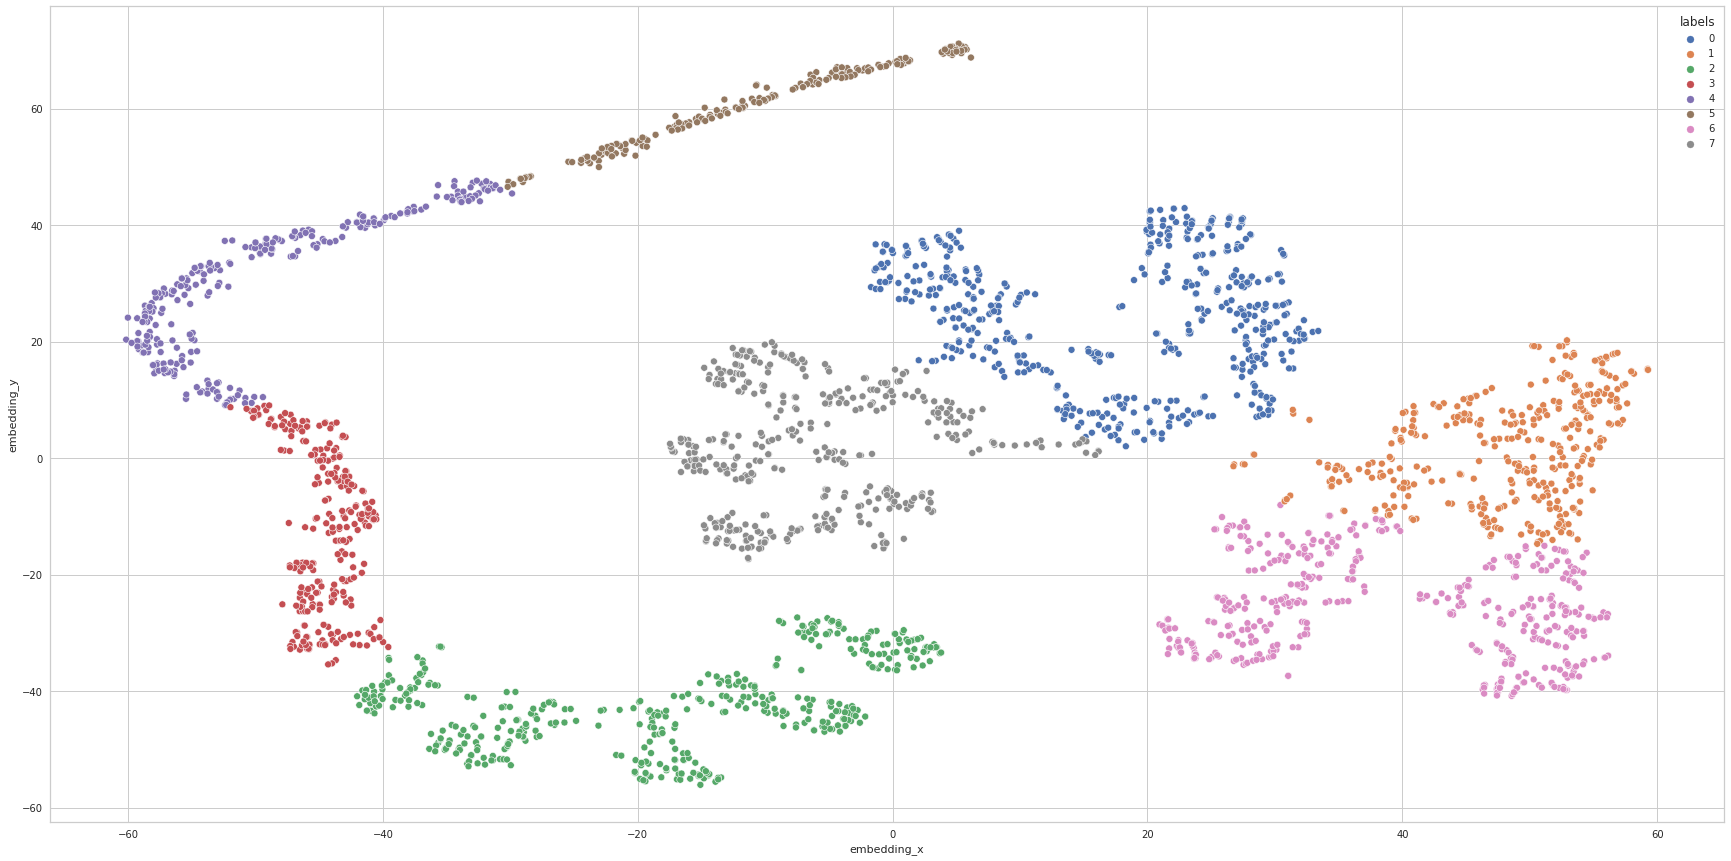

In [154]:
# plot t-SNE with labels
plt.figure(figsize=(30,15))
sns.scatterplot(x='embedding_x', y='embedding_y',hue='labels', data=Y, palette='deep') 

### Cluster Analysis

In [155]:
df9 = df4.copy()
df9['cluster'] = labels
df9.head()

### Number of Customers for Cluster and Percentage by Cluster
df_cluster = df9[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100*(np.round(df_cluster['customer_id'] / df_cluster['customer_id'].sum(), decimals=5))

### Average Gross Revenue
df_avg_gross_revenue = df9[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, np.round(df_avg_gross_revenue, decimals=3), how='inner', on='cluster')

### Average Recency Days
df_avg_recency_revenue = df9[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, np.round(df_avg_recency_revenue, decimals=3), how='inner', on='cluster')

### Average Invoice N°
#df_avg_invoice_no = df9[['invoice_no', 'cluster']].groupby('cluster').mean().reset_index()
# df_cluster = pd.merge(df_cluster, np.round(df_avg_invoice_no, decimals=3), how='inner', on='cluster')
df_cluster.sort_values('gross_revenue', ascending=False)

,cluster,customer_id,perc_customer,gross_revenue,recency_days
1,1,371,12.483,11639.946,6.695
0,0,534,17.968,1873.509,20.124
7,7,421,14.166,1738.918,36.140
2,2,453,15.242,1414.106,64.283
6,6,458,15.410,1369.173,6.081
3,3,270,9.085,1151.182,106.111
4,4,277,9.320,851.025,176.314
5,5,188,6.326,704.050,284.904


### Cluster 02 (Candidate to INSIDERS classification)
    -- Highest gross revenue and high frequency
    -- Only 12,48% of costumers.
    -- Recency = 6.695 days average
    -- Average Gross Revenue: 11639.946 dolars
    
### Cluster 06 (Second best client cluster)
    -- Lowest gross revenue but high frequency
    -- Only 15.410% of costumers.
    -- Recency = 6.081 days average
    -- Average Gross Revenue: 1369.173 dolars

Text(0.5, 1.0, 't-SNE')

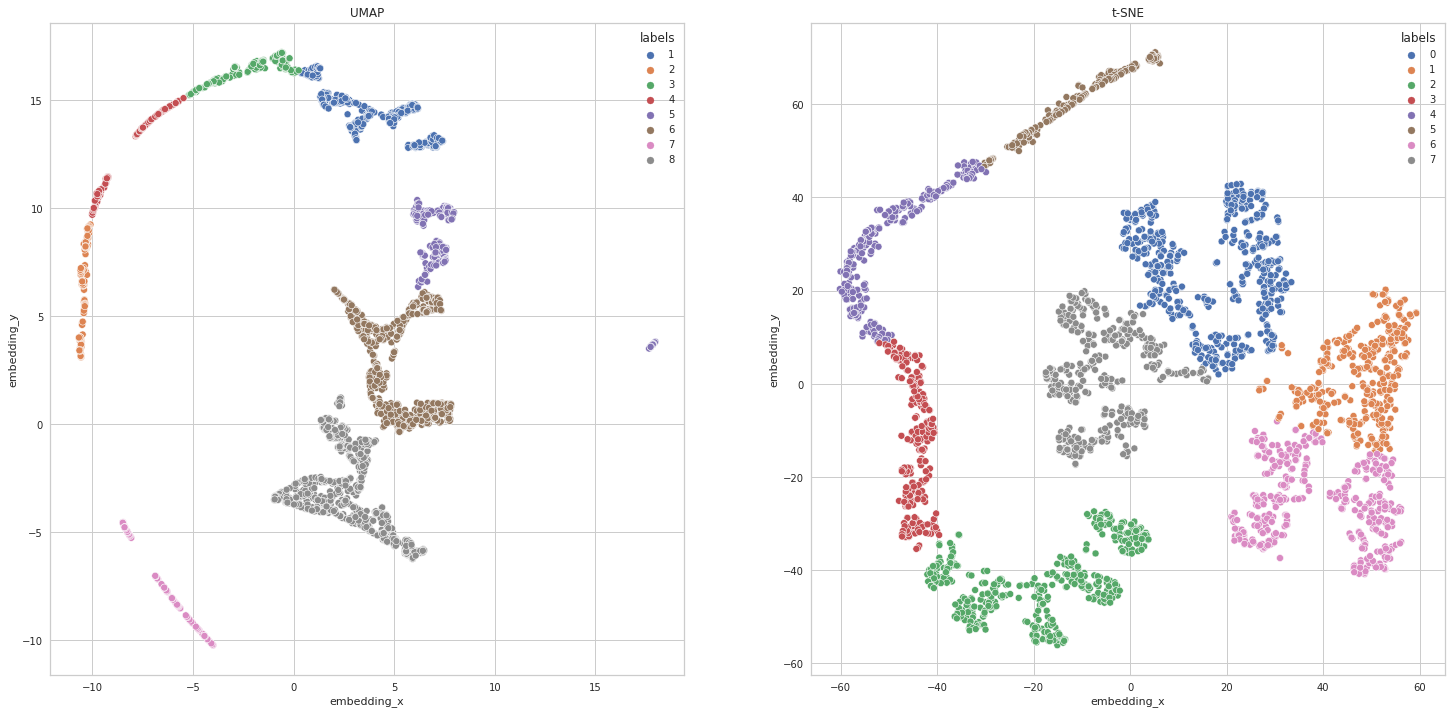

In [187]:
plt.figure(figsize=(25, 12))
plt.subplot(1, 2, 1)
sns.scatterplot(x='embedding_x', y='embedding_y', hue='labels', data=X, palette='deep')
plt.title('UMAP')

plt.subplot(1, 2, 2)
sns.scatterplot(x='embedding_x', y='embedding_y',hue='labels', data=Y, palette='deep') 
plt.title('t-SNE')